<a href="https://colab.research.google.com/github/DhruvAgg10/Python-projects/blob/main/Loanstatuspred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TARGET : TO PREDICT WHETHER A PERSON IS ELIGIBLE FOR A LOAN OR NOT
THEREFORE ITS A CLASSIFICATION PROBLEM


we will be using 2 algos
* random forest
* support vector machines




In [51]:
#import lib
import pandas as pd
import numpy as np
#import svm and random forest
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report


In [52]:
#import the dataset
dataset=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [53]:
dataset.head()
#status : shows whther loan will be approved or not

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
#check for null values
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [55]:
#there are some null values , so check how much big is the dataset and whether null values will effect or not
dataset.shape

(614, 13)

In [56]:
#all the values are not numerical so we cant use mean values to replace them so drop them
dataset=dataset.dropna()


now as we see loan status column has text in it but to train model we will have to convert in into numeric

In [57]:
#label encoding
dataset.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)


<ipython-input-57-5de0d78b5189>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)


In [58]:
#convert column with text data into numeric
dataset.replace({"Gender":{'Male':1,'Female':0},'Married': {'No':0, 'Yes':1},'Education':{'Graduate':0, 'Not Graduate':1}, 'Self_Employed':{'No':0, 'Yes':1},
                 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, }, inplace=True)

<ipython-input-58-1113635895ae>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({"Gender":{'Male':1,'Female':0},'Married': {'No':0, 'Yes':1},'Education':{'Graduate':0, 'Not Graduate':1}, 'Self_Employed':{'No':0, 'Yes':1},


In [59]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [60]:
dataset = dataset.drop(columns='Loan_ID', axis=1)
# we encountered cannot conver string to float: 3+ error therefore to resolve that
mapping = {'0':0,'1': 1, '2': 2, '3+': 4, }  # Define custom mapping
dataset['Dependents'] = dataset['Dependents'].map(mapping)
#seperate labels and data
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [68]:
#split data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [62]:
print(X_train.isnull().sum())  # Check NaN count per column

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [69]:
#train the model in svm
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

In [70]:
#train the model in random forest
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [71]:
#accuracy score
X_train_predsvm=classifier.predict(X_train)
training_data_accuracysvm=accuracy_score(X_train_predsvm,Y_train)
print(training_data_accuracysvm)
X_train_predrandom=model.predict(X_train)
training_data_accuracyrandom=accuracy_score(X_train_predrandom,Y_train)
print(training_data_accuracyrandom)

0.8032407407407407
1.0


In [72]:
#accuracy score
X_test_predsvm=classifier.predict(X_test)
testing_data_accuracysvm=accuracy_score(X_test_predsvm,Y_test)
print(testing_data_accuracysvm)
X_test_predrandom=model.predict(X_test)
testing_data_accuracyrandom=accuracy_score(X_test_predrandom,Y_test)
print(testing_data_accuracyrandom)

0.8125
0.8333333333333334


In [73]:
# Generate classification reports
print("Classification Report for SVM:")
print(classification_report(Y_test, X_test_predsvm))

print("Classification Report for Random Forest:")
print(classification_report(Y_test, X_test_predrandom))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        15
           1       0.79      1.00      0.88        33

    accuracy                           0.81        48
   macro avg       0.89      0.70      0.73        48
weighted avg       0.85      0.81      0.78        48

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.82      0.97      0.89        33

    accuracy                           0.83        48
   macro avg       0.85      0.75      0.78        48
weighted avg       0.84      0.83      0.82        48



In [75]:
Y_train = Y_train.values.ravel()  # Converts (num_samples, 1) → (num_samples,)
# Check types
print("Type of X_train:", type(X_train))
print("Type of Y_train:", type(Y_train))

# Convert to NumPy array if needed
import numpy as np
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values  # Convert DataFrame to NumPy array

if isinstance(Y_train, pd.DataFrame) or isinstance(Y_train, pd.Series):
    Y_train = Y_train.values.ravel()  # Flatten target variable

# Check shapes
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)

Type of X_train: <class 'pandas.core.frame.DataFrame'>
Type of Y_train: <class 'numpy.ndarray'>
Shape of X_train: (432, 11)
Shape of Y_train: (432,)


In [78]:
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()  # Convert to NumPy only if it's a DataFrame

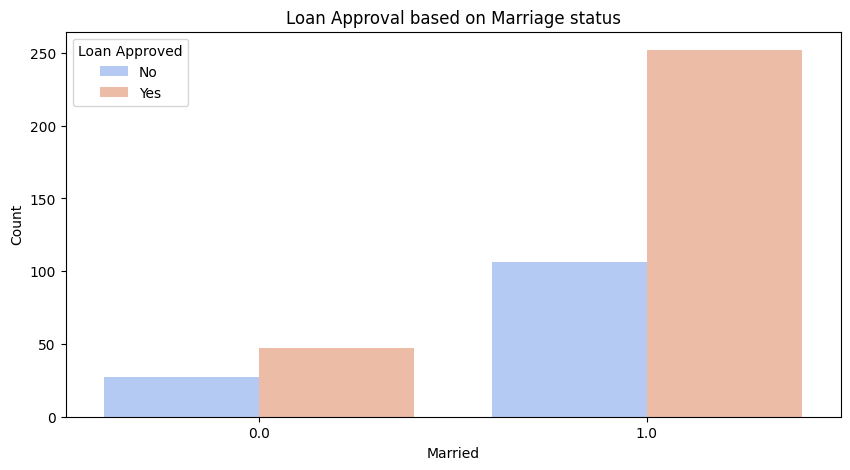

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert X_train and Y_train to DataFrame if needed
df = pd.DataFrame(X_train, columns=['Married', 'Dependents', 'Education', 'Self_Employed',
                                    'ApplicantIncome','CoapplicantIncome','Gender','LoanAmount'
                                    ,'Loan_Amount_Term','Credit_History','Property_Area'])
# Add all relevant columns
df['Loan_Status'] = Y_train  # Add loan approval status

# Plot categorical features
plt.figure(figsize=(10, 5))
sns.countplot(x='Married', hue='Loan_Status', data=df, palette="coolwarm")
plt.title('Loan Approval based on Marriage status')
plt.xlabel('Married')
plt.ylabel('Count')
plt.legend(title="Loan Approved", labels=['No', 'Yes'])
plt.show()
